Before we even start running this program, we need to create a modified csv file. We currently have our datapoints stored in a csv file that is stored in the 'relaxation_time_csv' folder. However, those csv files have three things that are needed to be be modified within them:

1. The csv files are too long.
2. There is no column for conductivity.
3. There is no column for $\Delta T$

To solve these problems, I would recommend going to 'modify_csv.ipynb' file and run that notebook, with the desired csv file as input. That will solve all those problems for you.

Once you are done with this. This come back and run this program. If you would like your graphs to be 'svg' images rather than 'png' image, then uncomment the underlying pieces of code in the next section. Warning: It takes a long time to complete this process, so I would recommend that you don't do it unless you don't have to.

In [1]:
# %config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import relaxation as rx
import numpy as np
import scipy as sc

Firstly, we are going to create dataframe from all the modified csv files of different temperature.

In [2]:
df_400 = pd.read_csv("/workspaces/kakalioslab/relaxation time/relaxation_time_modified/relaxation_time_temp_400.csv")

We are going to extract needed columns from the dataframe using the custom datatype called 'data' 

In [3]:

cond_400 = rx.scatter_data(df_400, "Conductivity_(S/cm)", column_type='y_column', label = "conductivity", legend_label="Cond at Temp = 400", color = 'purple', marker_size=20)
time_400 = rx.scatter_data(df_400, "Time_(s)", column_type='x_column', label = "time (s)", scale='log', marker_size=20)
temp_400 = rx.scatter_data(df_400, "Control_Temperature_(K)", column_type='y_prime_column', label = "Temperature_(K)", legend_label="Temp", color = 'r', marker_size=20)
delta_400 = rx.scatter_data(df_400, "Delta_T", column_type='y_column', label = "Delta (T)", legend_label="Delta at Temp = 400", color = 'purple', legend_location='upper right', marker_size=20)


We are going to extract needed columns from the dataframe using the custom datatype called 'data' 

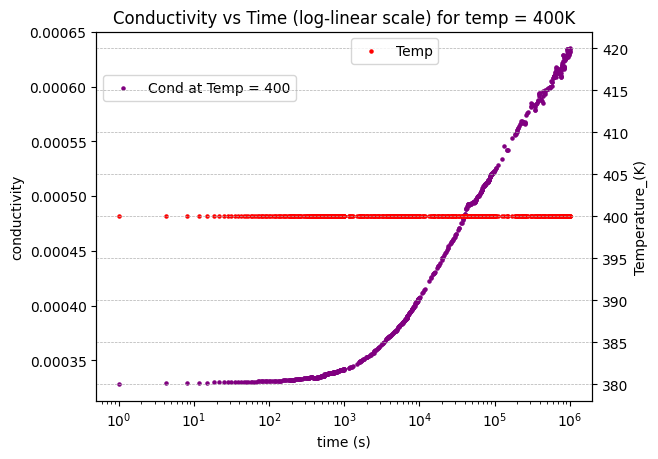

In [4]:

rx.scatter_plot(title='Conductivity vs Time (log-linear scale) for temp = 400K', x_column=time_400, y_column=cond_400, new_column={time_400:temp_400})

Next, we are going to find the value of $\beta$ and $\tau$ at different temperatures using berthelot prediction that goes as follows:

$$ \Delta \sigma = \text{exp}\left(-\left(\frac{t}{\tau}\right)^{\beta}\right) $$
In order to find the value of $\beta$ and $\tau$ by using the following mathematical trick:
$$ \Delta \sigma = \text{exp}\left(-\left(\frac{t}{\tau}\right)^{\beta}\right) $$
$$ \text{Take natural log on both sides}$$
$$ \ln(\Delta \sigma) = -\left(\frac{t}{\tau}\right)^{\beta}$$
$$ \text{Take absolute value on both sides}$$
$$ |\ln(\Delta \sigma)| = \left(\frac{t}{\tau}\right)^{\beta}$$
$$ \text{Take natural log on both sides}$$
$$ \ln(|\ln(\Delta \sigma)|) = \ln \left(\left(\frac{t}{\tau}\right)^{\beta}\right)$$
$$ \ln(|\ln(\Delta \sigma)|) = \ln({t}^{\beta}) - \ln({\tau}^{\beta})$$
$$ \ln(|\ln(\Delta \sigma)|) = \beta \cdot \ln({t}) - \beta \cdot \ln({\tau})$$

Now, we can use the above equation as a linear relation between $\ln(|\ln(\Delta \sigma)|)$ and $\ln({t})$. This can be used to find the slope and intercept of that line. And then can be used to find the value of $\beta$ and $\tau$

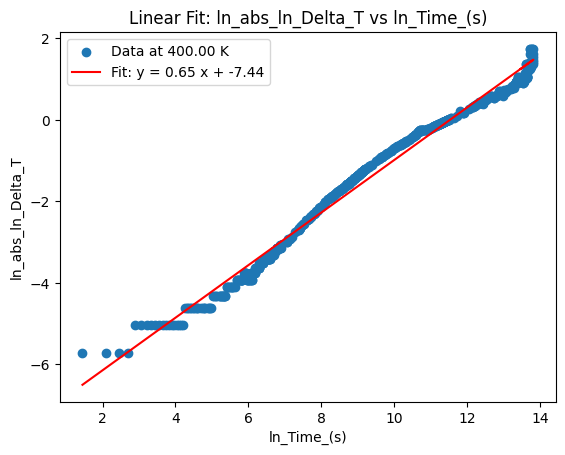

In [5]:
beta_b_400, tau_b_400 = rx.berthelot_prediction(df_400,0,0)

Next, we are going to compare our data with the dispersive diffusion formula and find the value of $\gamma$ and $\tau$ at different temperatures. The formula goes as follows:
$$\Delta = \frac{1}{1+\left(\frac{t}{\tau}\right)^{\gamma}}$$
$$\frac{1}{\Delta} =1+\left(\frac{t}{\tau}\right)^{\gamma}$$
$$\frac{1}{\Delta} - 1 =\left(\frac{t}{\tau}\right)^{\gamma}$$
$$ \text{Take natural log on both sides}$$
$$\ln\left(\frac{1}{\Delta} - 1\right) = \ln\left(\left(\frac{t}{\tau}\right)^{\gamma}\right)$$
$$\ln\left(\frac{1}{\Delta} - 1\right) = \ln ({t}^{\gamma}) - \ln ({\tau}^{\gamma})$$
$$\ln\left(\frac{1}{\Delta} - 1\right) = \gamma \cdot \ln (t) - \gamma \cdot \ln (\tau)$$
we can use the above equation as a linear relationship between $\ln\left(\frac{1}{\Delta} - 1\right)$ and $\ln(t)$. This can be used to find the slope and intercept of that line. And then can be used to find the value of $\gamma$ and $\tau$

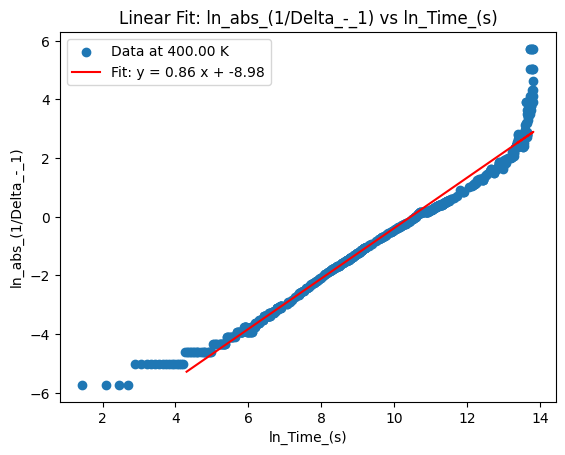

In [6]:

gamma_d_400, tau_d_400 = rx.dispersive_diffusion_prediction(df_400, 20,20)


Now, we come to the fun part. We are going to plot Delta in comparision with the berthelot process.

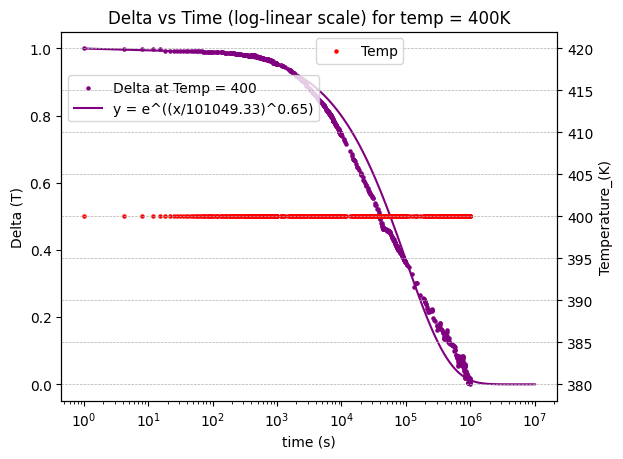

In [7]:

b_line_400 = rx.line_data(np.linspace(1,10**7,100000), np.exp(-(np.linspace(1,10**7,100000) / tau_b_400)**beta_b_400), legend_label=f'y = e^((x/{tau_b_400:.2f})^{beta_b_400:.2f})', color='purple')
rx.scatter_plot(title='Delta vs Time (log-linear scale) for temp = 400K', x_column=time_400, y_column=delta_400, new_column={time_400:temp_400}, new_line = [b_line_400])


Now, let's complare it to diffusive dispersion process

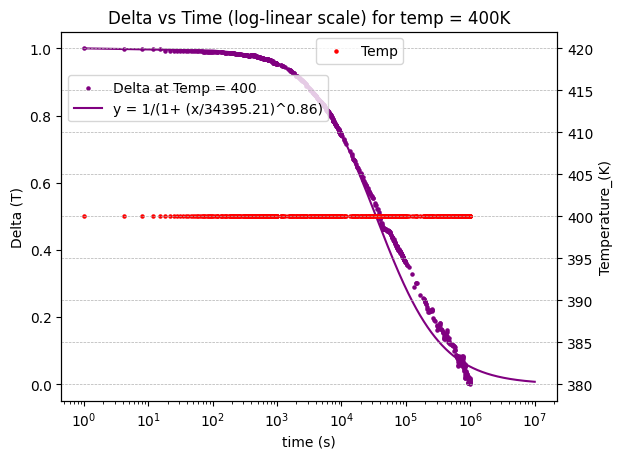

In [8]:
d_line_400 = rx.line_data(np.linspace(1,10**7,100000), 1/(1 + (np.linspace(1,10**7,100000)/ tau_d_400)**gamma_d_400), legend_label=f'y = 1/(1+ (x/{tau_d_400:.2f})^{gamma_d_400:.2f})', color='purple')
rx.scatter_plot(title='Delta vs Time (log-linear scale) for temp = 400K', x_column=time_400, y_column=delta_400, new_column={time_400:temp_400}, new_line = [d_line_400])


Now, It's time to play the same game at different temperatures

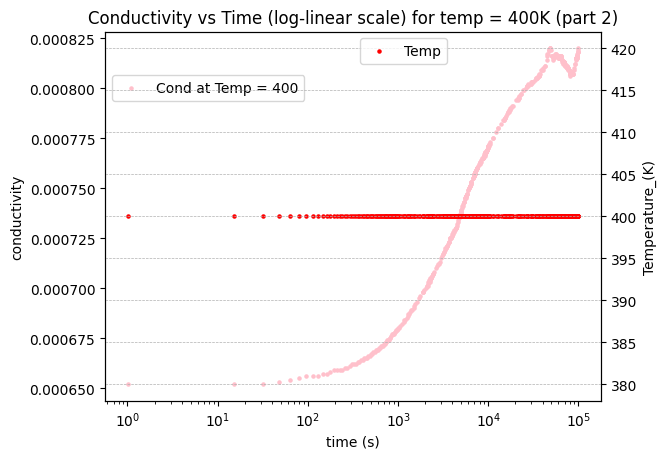

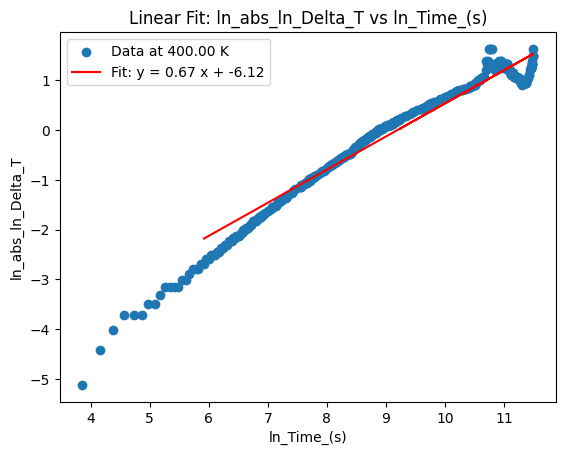

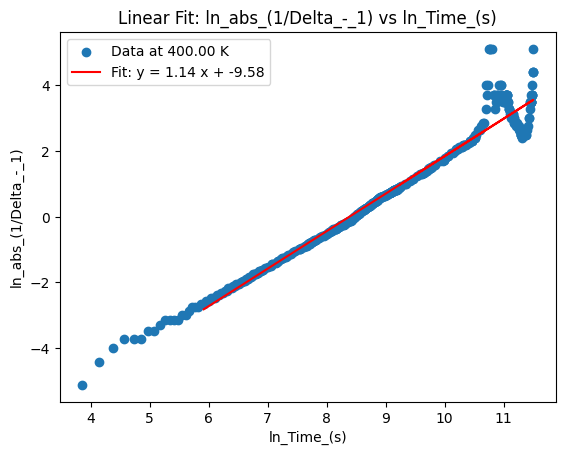

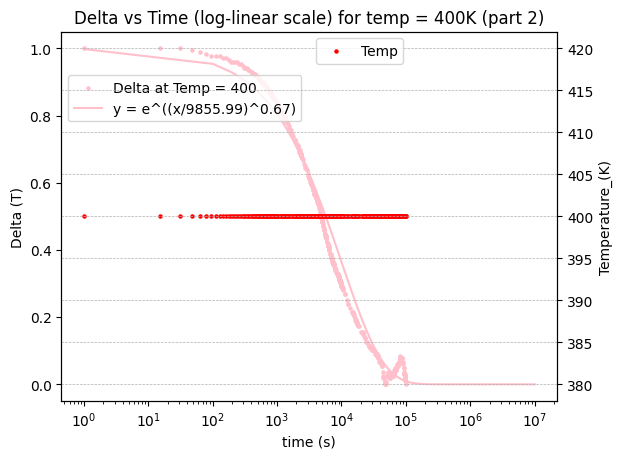

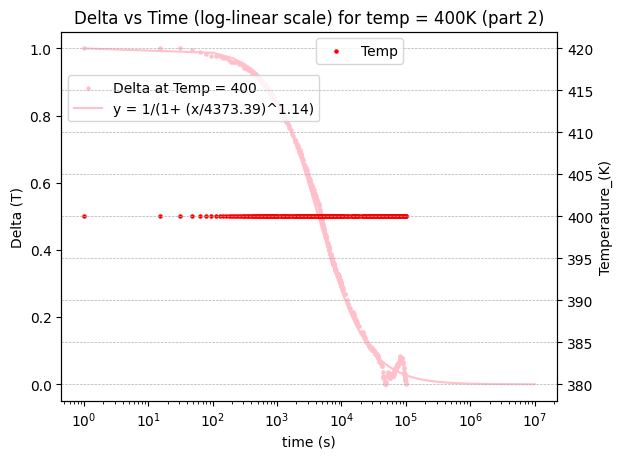

In [9]:
df_400_part_2 = pd.read_csv("/workspaces/kakalioslab/relaxation time/relaxation_time_modified/relaxation_time_temp_400_part_2.csv")
cond_400_part_2 = rx.scatter_data(df_400_part_2, "Conductivity_(S/cm)", column_type='y_column', label = "conductivity", legend_label="Cond at Temp = 400", color = 'pink', marker_size=20)
time_400_part_2 = rx.scatter_data(df_400_part_2, "Time_(s)", column_type='x_column', label = "time (s)", scale='log', marker_size=20)
temp_400_part_2 = rx.scatter_data(df_400_part_2, "Control_Temperature_(K)", column_type='y_prime_column', label = "Temperature_(K)", legend_label="Temp", color = 'r', marker_size=20)
delta_400_part_2 = rx.scatter_data(df_400_part_2, "Delta_T", column_type='y_column', label = "Delta (T)", legend_label="Delta at Temp = 400", color = 'pink', legend_location='upper right', marker_size=20)

rx.scatter_plot(title='Conductivity vs Time (log-linear scale) for temp = 400K (part 2)', x_column=time_400_part_2, y_column=cond_400_part_2, new_column={time_400_part_2:temp_400_part_2})

beta_b_400_part_2, tau_b_400_part_2 = rx.berthelot_prediction(df_400_part_2, 20 , 20)

gamma_d_400_part_2, tau_d_400_part_2 = rx.dispersive_diffusion_prediction(df_400_part_2, 20,20)

b_line_400_part_2 = rx.line_data(np.linspace(1,10**7,100000), np.exp(-(np.linspace(1,10**7,100000) / tau_b_400_part_2)**beta_b_400_part_2), legend_label=f'y = e^((x/{tau_b_400_part_2:.2f})^{beta_b_400_part_2:.2f})', color='pink')
rx.scatter_plot(title='Delta vs Time (log-linear scale) for temp = 400K (part 2)', x_column=time_400_part_2, y_column=delta_400_part_2, new_column={time_400_part_2:temp_400_part_2}, new_line = [b_line_400_part_2])

d_line_400_part_2 = rx.line_data(np.linspace(1,10**7,100000), 1/(1 + (np.linspace(1,10**7,100000)/ tau_d_400_part_2)**gamma_d_400_part_2), legend_label=f'y = 1/(1+ (x/{tau_d_400_part_2:.2f})^{gamma_d_400_part_2:.2f})', color='pink')
rx.scatter_plot(title='Delta vs Time (log-linear scale) for temp = 400K (part 2)', x_column=time_400_part_2, y_column=delta_400_part_2, new_column={time_400_part_2:temp_400_part_2}, new_line = [d_line_400_part_2])


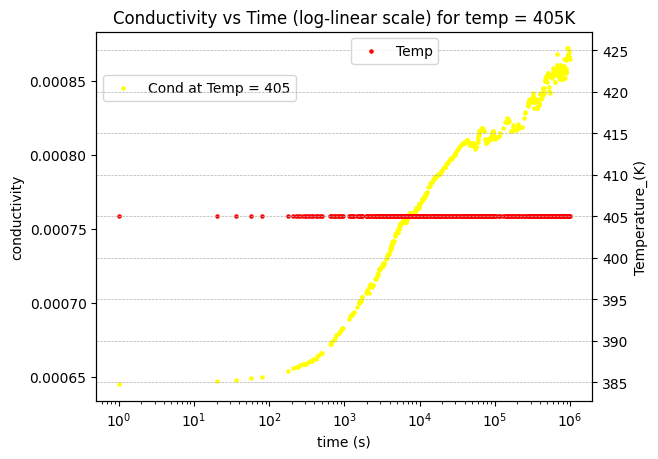

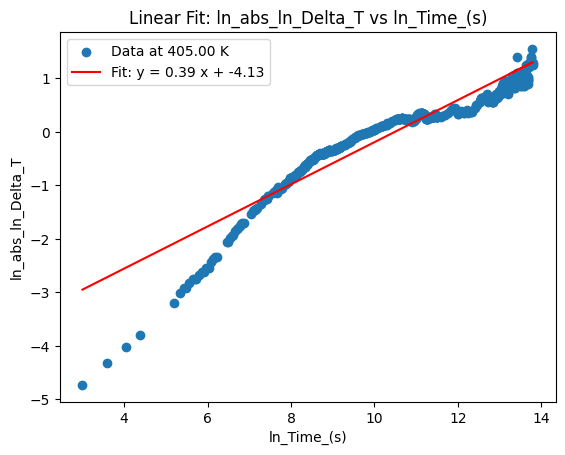

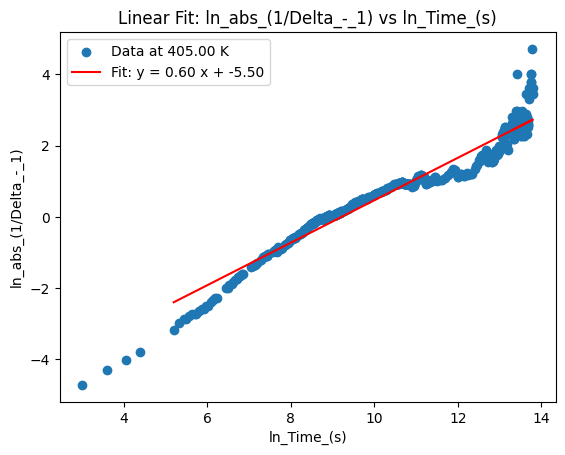

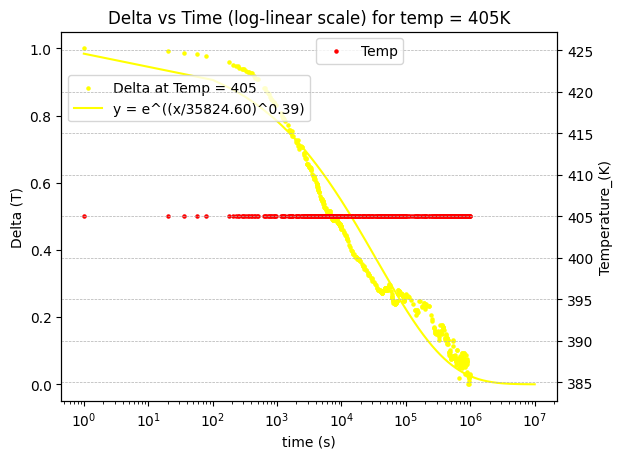

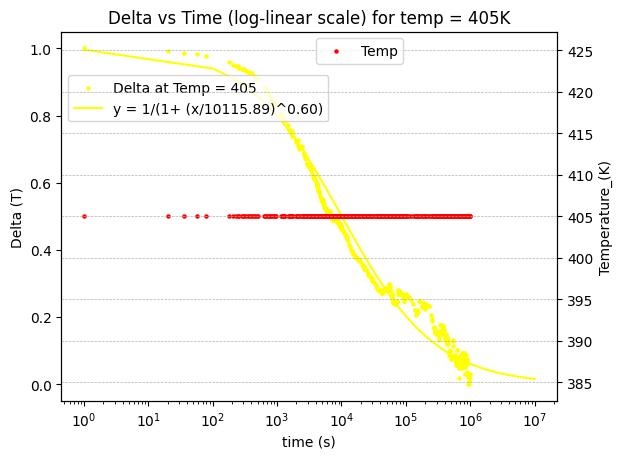

In [10]:
df_405 = pd.read_csv("/workspaces/kakalioslab/relaxation time/relaxation_time_modified/relaxation_time_temp_405.csv")
cond_405 = rx.scatter_data(df_405, "Conductivity_(S/cm)", column_type='y_column', label = "conductivity", legend_label="Cond at Temp = 405", color = 'yellow', marker_size=20)
time_405 = rx.scatter_data(df_405, "Time_(s)", column_type='x_column', label = "time (s)", scale='log', marker_size=20)
temp_405 = rx.scatter_data(df_405, "Control_Temperature_(K)", column_type='y_prime_column', label = "Temperature_(K)", legend_label="Temp", color = 'r', marker_size=20)
delta_405 = rx.scatter_data(df_405, "Delta_T", column_type='y_column', label = "Delta (T)", legend_label="Delta at Temp = 405", color = 'yellow', legend_location='upper right', marker_size=20)

rx.scatter_plot(title='Conductivity vs Time (log-linear scale) for temp = 405K', x_column=time_405, y_column=cond_405, new_column={time_405:temp_405})

beta_b_405, tau_b_405 = rx.berthelot_prediction(df_405, 0 , 40)

gamma_d_405, tau_d_405 = rx.dispersive_diffusion_prediction(df_405, 4, 40)

b_line_405 = rx.line_data(np.linspace(1,10**7,100000), np.exp(-(np.linspace(1,10**7,100000) / tau_b_405)**beta_b_405), legend_label=f'y = e^((x/{tau_b_405:.2f})^{beta_b_405:.2f})', color='yellow')
rx.scatter_plot(title='Delta vs Time (log-linear scale) for temp = 405K', x_column=time_405, y_column=delta_405, new_column={time_405:temp_405}, new_line = [b_line_405])

d_line_405 = rx.line_data(np.linspace(1,10**7,100000), 1/(1 + (np.linspace(1,10**7,100000)/ tau_d_405)**gamma_d_405), legend_label=f'y = 1/(1+ (x/{tau_d_405:.2f})^{gamma_d_405:.2f})', color='yellow')
rx.scatter_plot(title='Delta vs Time (log-linear scale) for temp = 405K', x_column=time_405, y_column=delta_405, new_column={time_405:temp_405}, new_line = [d_line_405])


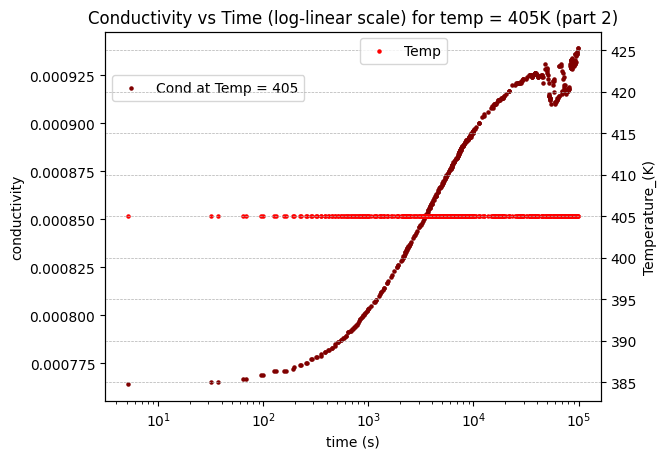

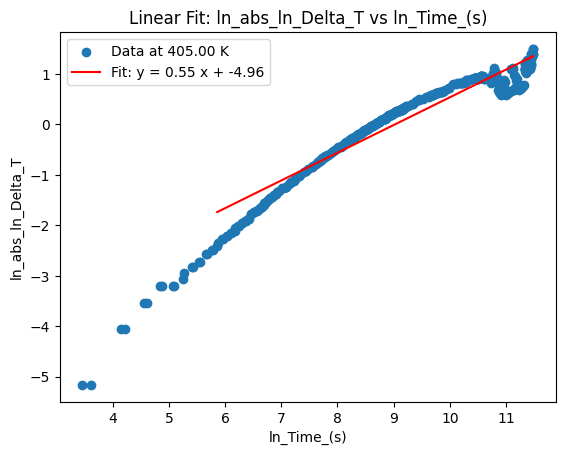

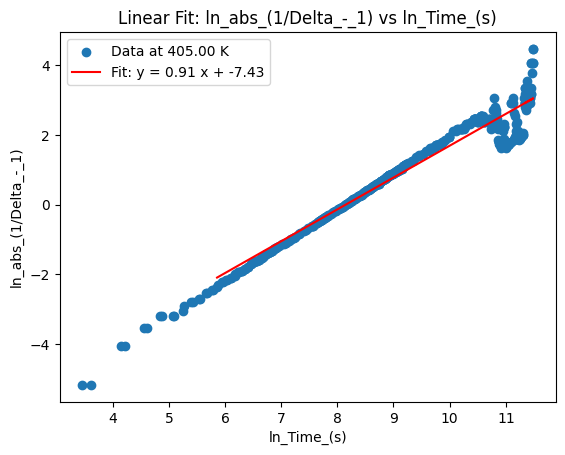

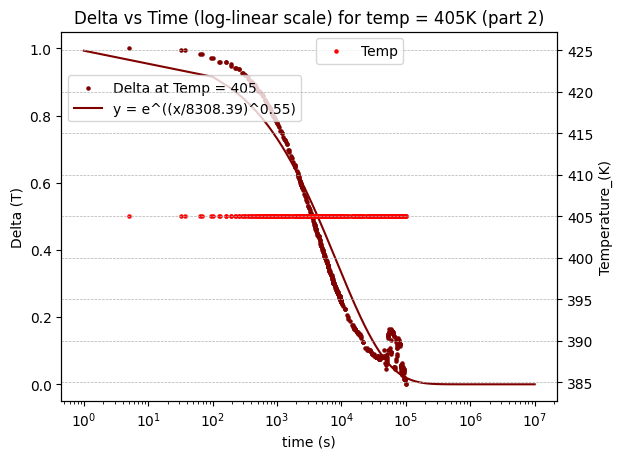

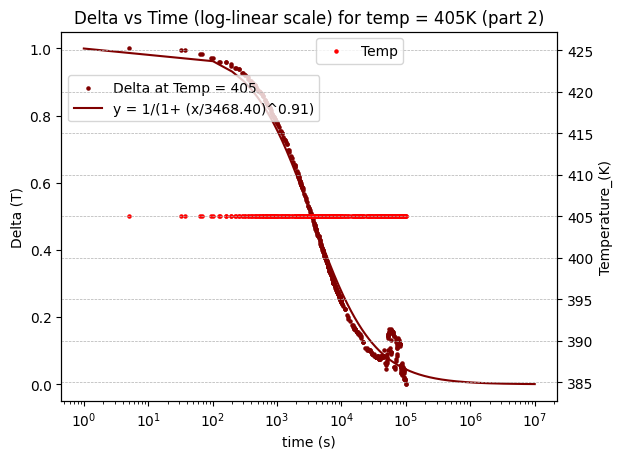

In [11]:
df_405_part_2 = pd.read_csv("/workspaces/kakalioslab/relaxation time/relaxation_time_modified/relaxation_time_temp_405_part_2.csv")
cond_405_part_2 = rx.scatter_data(df_405_part_2, "Conductivity_(S/cm)", column_type='y_column', label = "conductivity", legend_label="Cond at Temp = 405", color = 'maroon', marker_size=20)
time_405_part_2 = rx.scatter_data(df_405_part_2, "Time_(s)", column_type='x_column', label = "time (s)", scale='log', marker_size=20)
temp_405_part_2 = rx.scatter_data(df_405_part_2, "Control_Temperature_(K)", column_type='y_prime_column', label = "Temperature_(K)", legend_label="Temp", color = 'r', marker_size=20)
delta_405_part_2 = rx.scatter_data(df_405_part_2, "Delta_T", column_type='y_column', label = "Delta (T)", legend_label="Delta at Temp = 405", color = 'maroon', legend_location='upper right', marker_size=20)

rx.scatter_plot(title='Conductivity vs Time (log-linear scale) for temp = 405K (part 2)', x_column=time_405_part_2, y_column=cond_405_part_2, new_column={time_405_part_2:temp_405_part_2})

beta_b_405_part_2, tau_b_405_part_2 = rx.berthelot_prediction(df_405_part_2, 20, 20)

gamma_d_405_part_2, tau_d_405_part_2 = rx.dispersive_diffusion_prediction(df_405_part_2, 20, 20)

b_line_405_part_2 = rx.line_data(np.linspace(1,10**7,100000), np.exp(-(np.linspace(1,10**7,100000) / tau_b_405_part_2)**beta_b_405_part_2), legend_label=f'y = e^((x/{tau_b_405_part_2:.2f})^{beta_b_405_part_2:.2f})', color='maroon')
rx.scatter_plot(title='Delta vs Time (log-linear scale) for temp = 405K (part 2)', x_column=time_405_part_2, y_column=delta_405_part_2, new_column={time_405_part_2:temp_405_part_2}, new_line = [b_line_405_part_2])

d_line_405_part_2 = rx.line_data(np.linspace(1,10**7,100000), 1/(1 + (np.linspace(1,10**7,100000)/ tau_d_405_part_2)**gamma_d_405_part_2), legend_label=f'y = 1/(1+ (x/{tau_d_405_part_2:.2f})^{gamma_d_405_part_2:.2f})', color='maroon')
rx.scatter_plot(title='Delta vs Time (log-linear scale) for temp = 405K (part 2)', x_column=time_405_part_2, y_column=delta_405_part_2, new_column={time_405_part_2:temp_405_part_2}, new_line = [d_line_405_part_2])


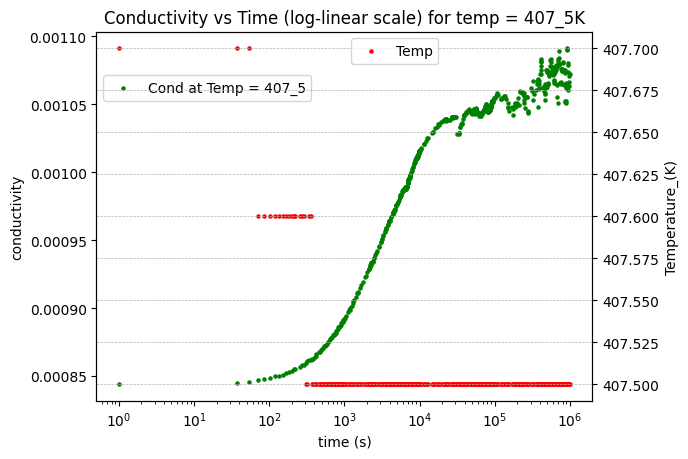

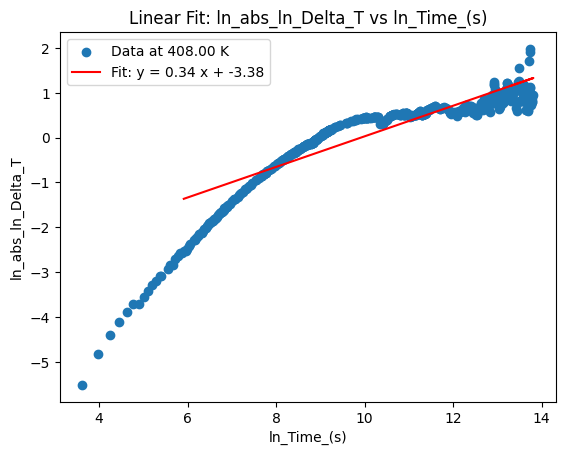

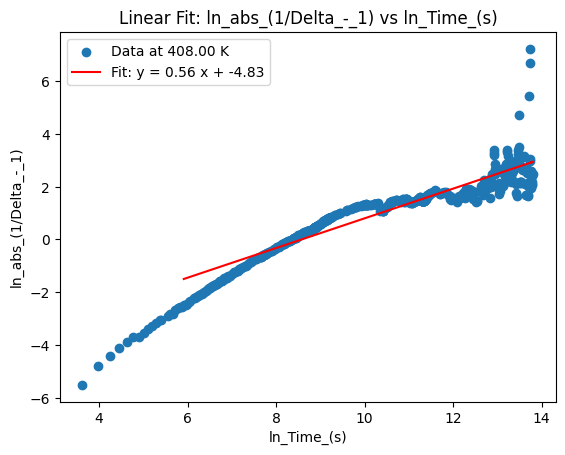

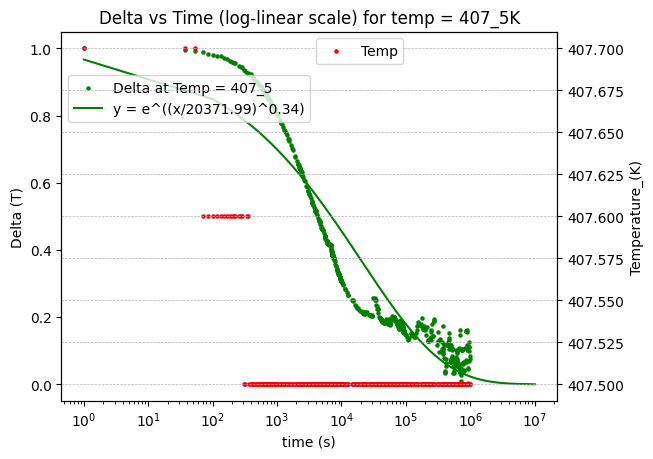

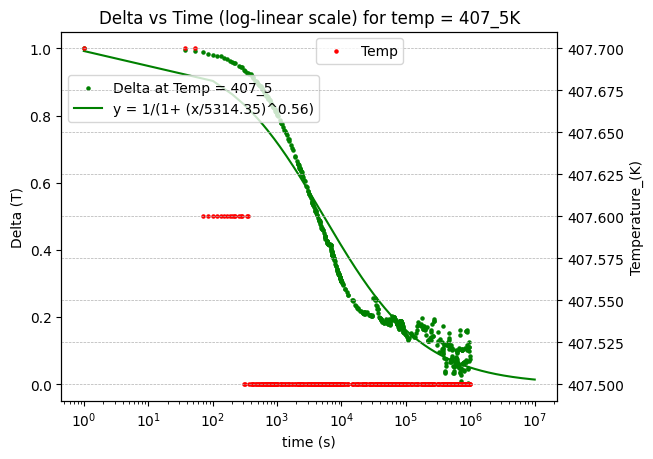

In [12]:
df_407_5 = pd.read_csv("/workspaces/kakalioslab/relaxation time/relaxation_time_modified/relaxation_time_temp_407.5.csv")
cond_407_5 = rx.scatter_data(df_407_5, "Conductivity_(S/cm)", column_type='y_column', label = "conductivity", legend_label="Cond at Temp = 407_5", color = 'g', marker_size=20)
time_407_5 = rx.scatter_data(df_407_5, "Time_(s)", column_type='x_column', label = "time (s)", scale='log', marker_size=20)
temp_407_5 = rx.scatter_data(df_407_5, "Control_Temperature_(K)", column_type='y_prime_column', label = "Temperature_(K)", legend_label="Temp", color = 'r', marker_size=20)
delta_407_5 = rx.scatter_data(df_407_5, "Delta_T", column_type='y_column', label = "Delta (T)", legend_label="Delta at Temp = 407_5", color = 'g', legend_location='upper right', marker_size=20)

rx.scatter_plot(title='Conductivity vs Time (log-linear scale) for temp = 407_5K', x_column=time_407_5, y_column=cond_407_5, new_column={time_407_5:temp_407_5})

beta_b_407_5, tau_b_407_5 = rx.berthelot_prediction(df_407_5, 20 , 10)

gamma_d_407_5, tau_d_407_5 = rx.dispersive_diffusion_prediction(df_407_5, 20, 20)

b_line_407_5 = rx.line_data(np.linspace(1,10**7,100000), np.exp(-(np.linspace(1,10**7,100000) / tau_b_407_5)**beta_b_407_5), legend_label=f'y = e^((x/{tau_b_407_5:.2f})^{beta_b_407_5:.2f})', color='g')
rx.scatter_plot(title='Delta vs Time (log-linear scale) for temp = 407_5K', x_column=time_407_5, y_column=delta_407_5, new_column={time_407_5:temp_407_5}, new_line = [b_line_407_5])

d_line_407_5 = rx.line_data(np.linspace(1,10**7,100000), 1/(1 + (np.linspace(1,10**7,100000)/ tau_d_407_5)**gamma_d_407_5), legend_label=f'y = 1/(1+ (x/{tau_d_407_5:.2f})^{gamma_d_407_5:.2f})', color='g')
rx.scatter_plot(title='Delta vs Time (log-linear scale) for temp = 407_5K', x_column=time_407_5, y_column=delta_407_5, new_column={time_407_5:temp_407_5}, new_line = [d_line_407_5])


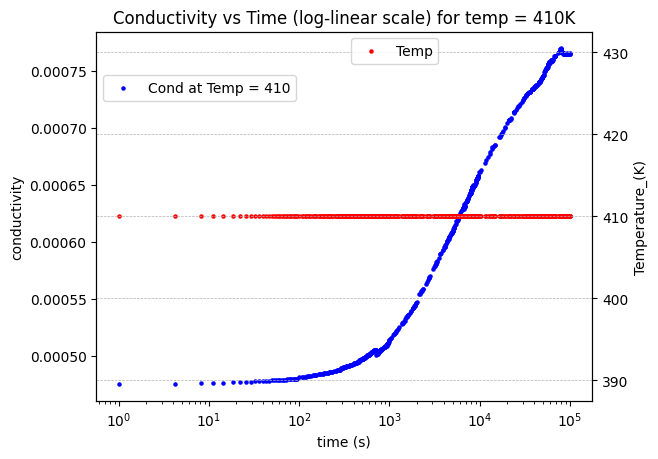

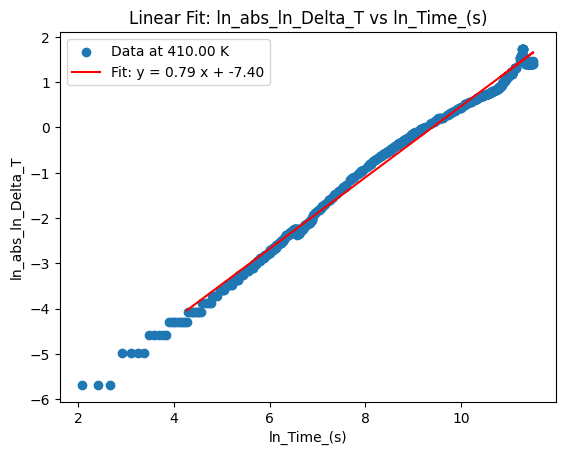

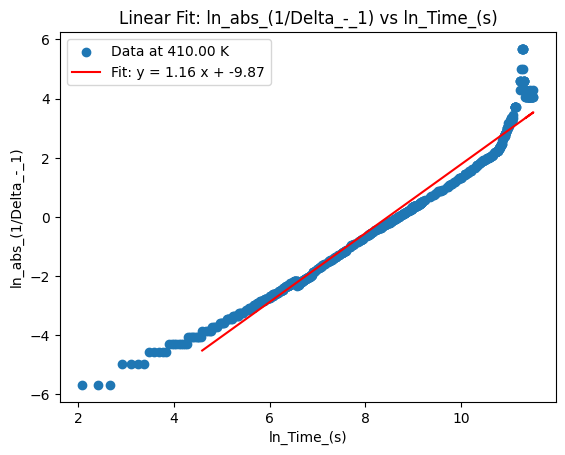

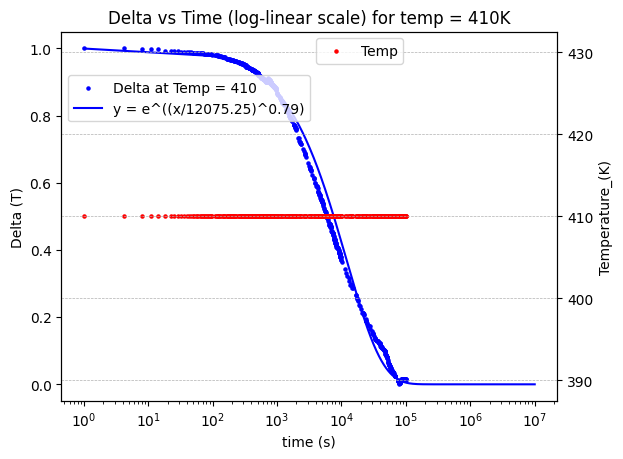

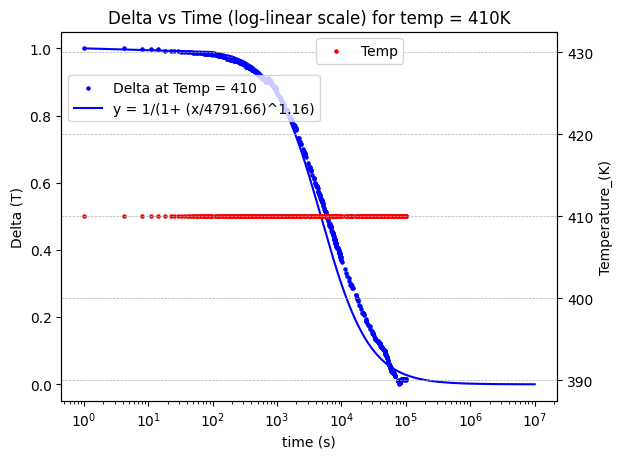

In [13]:
df_410 = pd.read_csv("/workspaces/kakalioslab/relaxation time/relaxation_time_modified/relaxation_time_temp_410.csv")
cond_410 = rx.scatter_data(df_410, "Conductivity_(S/cm)", column_type='y_column', label = "conductivity", legend_label="Cond at Temp = 410", color = 'b', marker_size=20)
time_410 = rx.scatter_data(df_410, "Time_(s)", column_type='x_column', label = "time (s)", scale='log', marker_size=20)
temp_410 = rx.scatter_data(df_410, "Control_Temperature_(K)", column_type='y_prime_column', label = "Temperature_(K)", legend_label="Temp", color = 'r', marker_size=20)
delta_410 = rx.scatter_data(df_410, "Delta_T", column_type='y_column', label = "Delta (T)", legend_label="Delta at Temp = 410", color = 'b', legend_location='upper right', marker_size=20)

rx.scatter_plot(title='Conductivity vs Time (log-linear scale) for temp = 410K', x_column=time_410, y_column=cond_410, new_column={time_410:temp_410})

beta_b_410, tau_b_410 = rx.berthelot_prediction(df_410, 20, 20)

gamma_d_410, tau_d_410 = rx.dispersive_diffusion_prediction(df_410, 30, 17)

b_line_410 = rx.line_data(np.linspace(1,10**7,100000), np.exp(-(np.linspace(1,10**7,100000) / tau_b_410)**beta_b_410), legend_label=f'y = e^((x/{tau_b_410:.2f})^{beta_b_410:.2f})', color='b')

rx.scatter_plot(title='Delta vs Time (log-linear scale) for temp = 410K', x_column=time_410, y_column=delta_410, new_column={time_410:temp_410}, new_line = [b_line_410])

d_line_410 = rx.line_data(np.linspace(1,10**7,100000), 1/(1 + (np.linspace(1,10**7,100000)/ tau_d_410)**gamma_d_410), legend_label=f'y = 1/(1+ (x/{tau_d_410:.2f})^{gamma_d_410:.2f})', color='b')
rx.scatter_plot(title='Delta vs Time (log-linear scale) for temp = 410K', x_column=time_410, y_column=delta_410, new_column={time_410:temp_410}, new_line = [d_line_410])


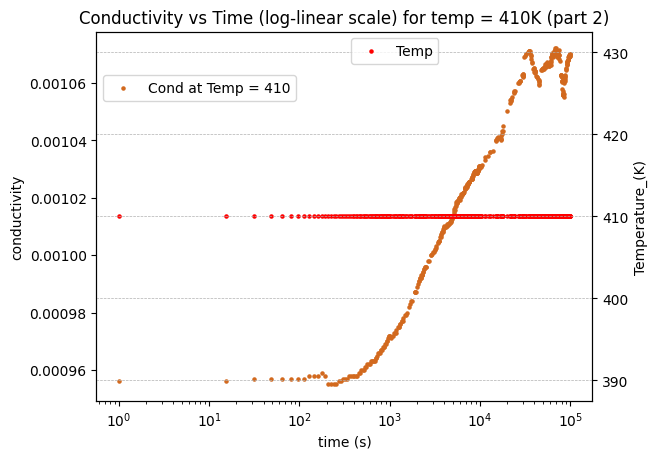

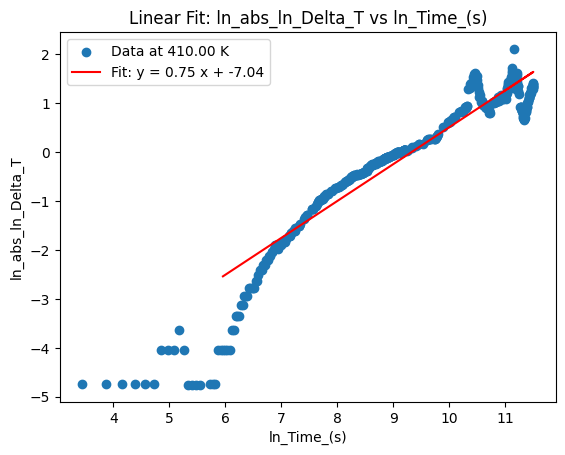

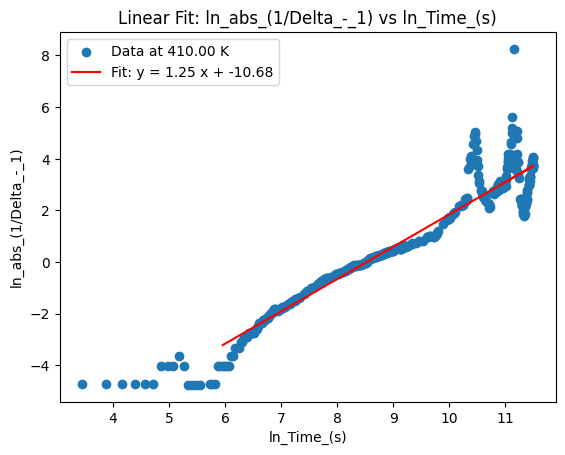

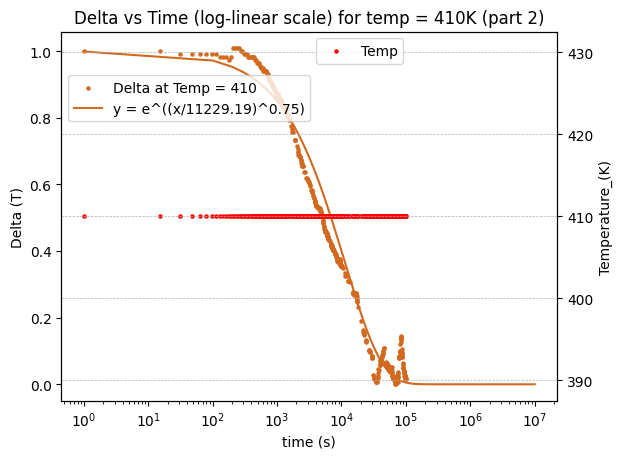

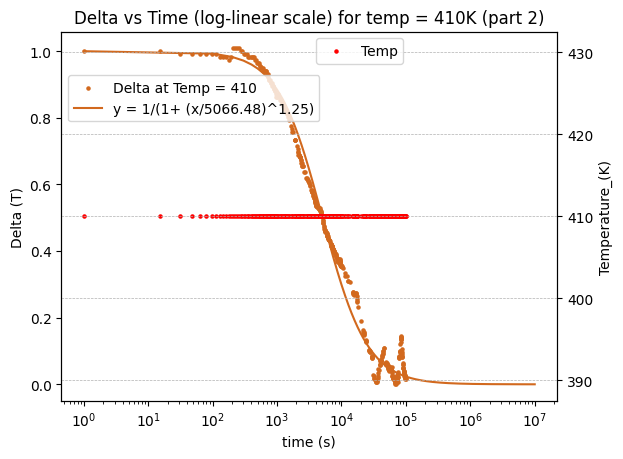

In [14]:
df_410_part_2 = pd.read_csv("/workspaces/kakalioslab/relaxation time/relaxation_time_modified/relaxation_time_temp_410_part_2.csv")
cond_410_part_2 = rx.scatter_data(df_410_part_2, "Conductivity_(S/cm)", column_type='y_column', label = "conductivity", legend_label="Cond at Temp = 410", color = 'chocolate', marker_size=20)
time_410_part_2 = rx.scatter_data(df_410_part_2, "Time_(s)", column_type='x_column', label = "time (s)", scale='log', marker_size=20)
temp_410_part_2 = rx.scatter_data(df_410_part_2, "Control_Temperature_(K)", column_type='y_prime_column', label = "Temperature_(K)", legend_label="Temp", color = 'r', marker_size=20)
delta_410_part_2 = rx.scatter_data(df_410_part_2, "Delta_T", column_type='y_column', label = "Delta (T)", legend_label="Delta at Temp = 410", color = 'chocolate', legend_location='upper right', marker_size=20)

rx.scatter_plot(title='Conductivity vs Time (log-linear scale) for temp = 410K (part 2)', x_column=time_410_part_2, y_column=cond_410_part_2, new_column={time_410_part_2:temp_410_part_2})

beta_b_410_part_2, tau_b_410_part_2 = rx.berthelot_prediction(df_410_part_2, 20, 20)

gamma_d_410_part_2, tau_d_410_part_2 = rx.dispersive_diffusion_prediction(df_410_part_2, 20, 20)

b_line_410_part_2 = rx.line_data(np.linspace(1,10**7,100000), np.exp(-(np.linspace(1,10**7,100000) / tau_b_410_part_2)**beta_b_410_part_2), legend_label=f'y = e^((x/{tau_b_410_part_2:.2f})^{beta_b_410_part_2:.2f})', color='chocolate')
rx.scatter_plot(title='Delta vs Time (log-linear scale) for temp = 410K (part 2)', x_column=time_410_part_2, y_column=delta_410_part_2, new_column={time_410_part_2:temp_410_part_2}, new_line = [b_line_410_part_2])

d_line_410_part_2 = rx.line_data(np.linspace(1,10**7,100000), 1/(1 + (np.linspace(1,10**7,100000)/ tau_d_410_part_2)**gamma_d_410_part_2), legend_label=f'y = 1/(1+ (x/{tau_d_410_part_2:.2f})^{gamma_d_410_part_2:.2f})', color='chocolate')
rx.scatter_plot(title='Delta vs Time (log-linear scale) for temp = 410K (part 2)', x_column=time_410_part_2, y_column=delta_410_part_2, new_column={time_410_part_2:temp_410_part_2}, new_line = [d_line_410_part_2])


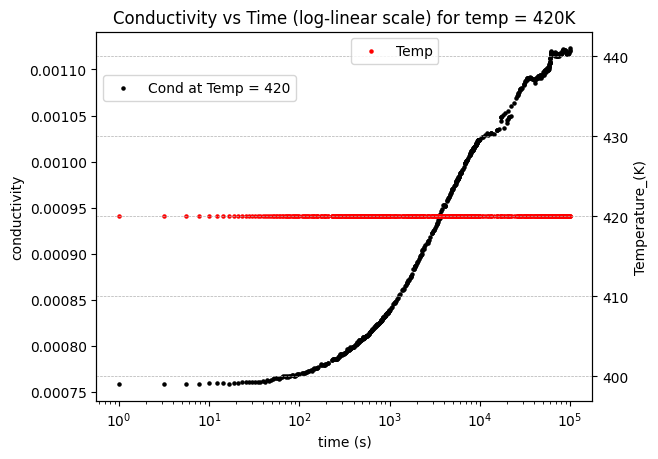

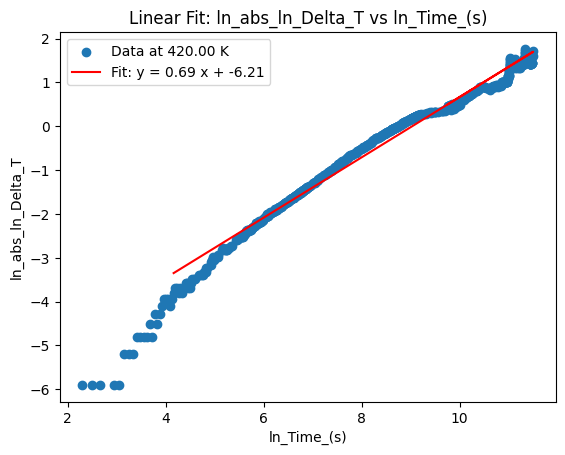

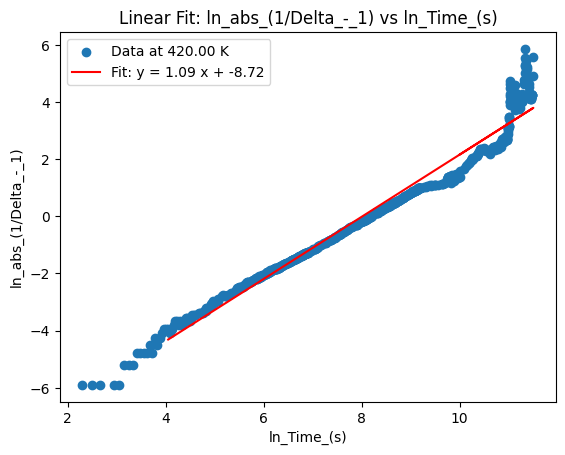

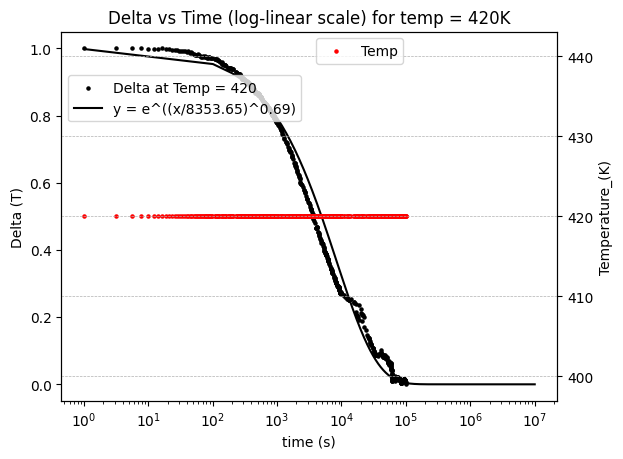

In [15]:
df_420 = pd.read_csv("/workspaces/kakalioslab/relaxation time/relaxation_time_modified/relaxation_time_temp_420.csv")
cond_420 = rx.scatter_data(df_420, "Conductivity_(S/cm)", column_type='y_column', label = "conductivity", legend_label="Cond at Temp = 420", color = 'black', marker_size=20)
time_420 = rx.scatter_data(df_420, "Time_(s)", column_type='x_column', label = "time (s)", scale='log', marker_size=20)
temp_420 = rx.scatter_data(df_420, "Control_Temperature_(K)", column_type='y_prime_column', label = "Temperature_(K)", legend_label="Temp", color = 'r', marker_size=20)
delta_420 = rx.scatter_data(df_420, "Delta_T", column_type='y_column', label = "Delta (T)", legend_label="Delta at Temp = 420", color = 'black', legend_location='upper right', marker_size=20)

rx.scatter_plot(title='Conductivity vs Time (log-linear scale) for temp = 420K', x_column=time_420, y_column=cond_420, new_column={time_420:temp_420})

beta_b_420, tau_b_420 = rx.berthelot_prediction(df_420, 23, 30)

gamma_d_420, tau_d_420 = rx.dispersive_diffusion_prediction(df_420, 20, 15)

b_line_420 = rx.line_data(np.linspace(1,10**7,100000), np.exp(-(np.linspace(1,10**7,100000) / tau_b_420)**beta_b_420), legend_label=f'y = e^((x/{tau_b_420:.2f})^{beta_b_420:.2f})', color = 'black')

rx.scatter_plot(title='Delta vs Time (log-linear scale) for temp = 420K', x_column=time_420, y_column=delta_420, new_column={time_420:temp_420}, new_line = [b_line_420])

# d_line_420 = rx.line_data(np.linspace(1,10**7,100000), 1/(1 + (np.linspace(1,10**7,100000)/ tau_d_420)**gamma_d_420), legend_label=f'y = 1/(1+ (x/{tau_d_420:.2f})^{gamma_d_420:.2f})', color = 'black')
# rx.scatter_plot(title='Delta vs Time (log-linear scale) for temp = 420K', x_column=time_420, y_column=delta_420, new_column={time_420:temp_420}, new_line = [d_line_420])


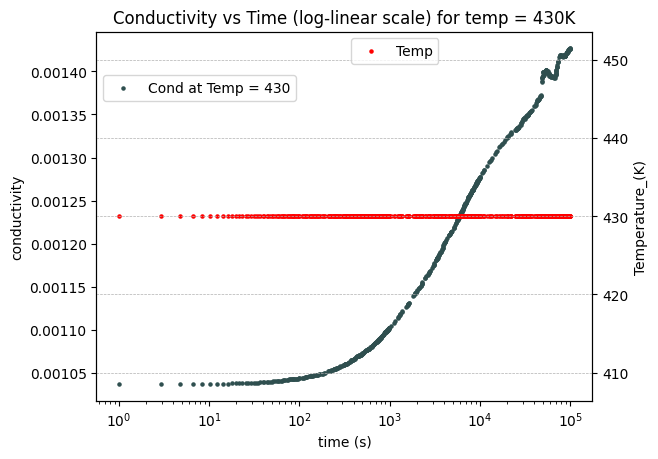

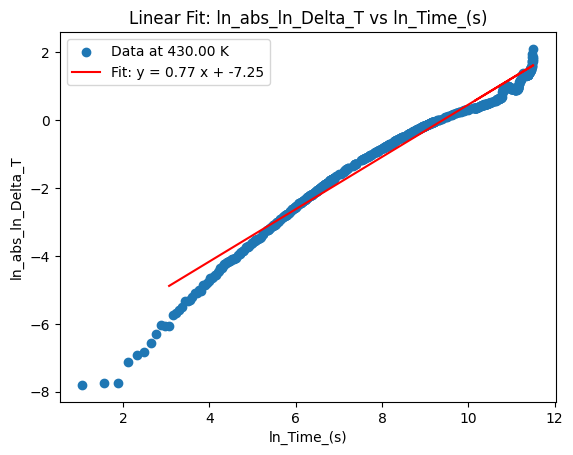

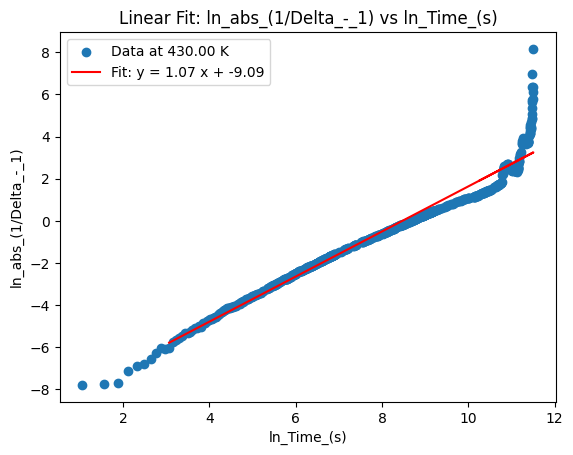

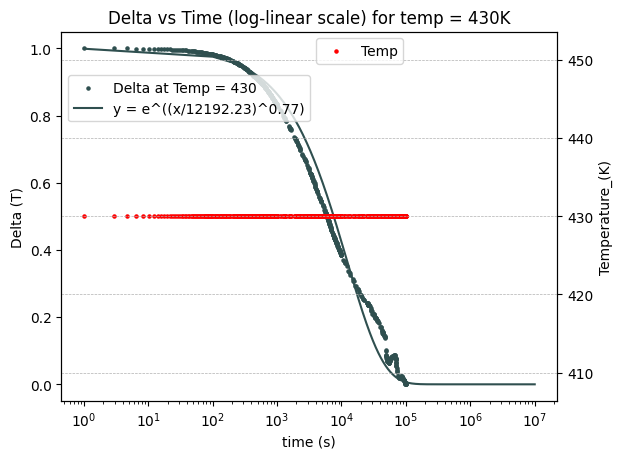

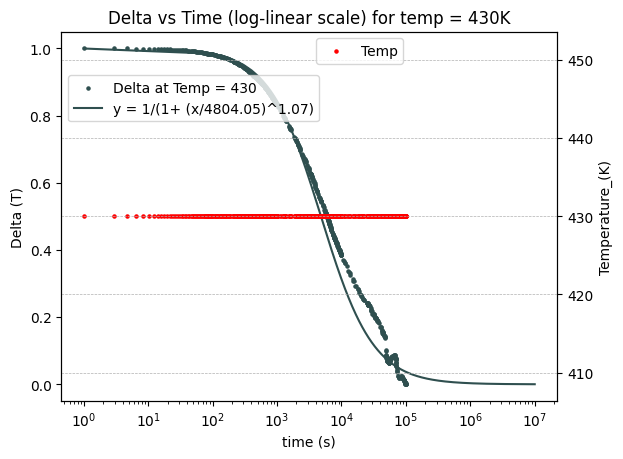

In [16]:
df_430 = pd.read_csv("/workspaces/kakalioslab/relaxation time/relaxation_time_modified/relaxation_time_temp_430.csv")
cond_430 = rx.scatter_data(df_430, "Conductivity_(S/cm)", column_type='y_column', label = "conductivity", legend_label="Cond at Temp = 430", color = 'DarkSlateGray', marker_size=20)
time_430 = rx.scatter_data(df_430, "Time_(s)", column_type='x_column', label = "time (s)", scale='log', marker_size=20)
temp_430 = rx.scatter_data(df_430, "Control_Temperature_(K)", column_type='y_prime_column', label = "Temperature_(K)", legend_label="Temp", color = 'r', marker_size=20)
delta_430 = rx.scatter_data(df_430, "Delta_T", column_type='y_column', label = "Delta (T)", legend_label="Delta at Temp = 430", color = 'DarkSlateGray', legend_location='upper right', marker_size=20)

rx.scatter_plot(title='Conductivity vs Time (log-linear scale) for temp = 430K', x_column=time_430, y_column=cond_430, new_column={time_430:temp_430})

beta_b_430, tau_b_430 = rx.berthelot_prediction(df_430, 10, 20)

gamma_d_430, tau_d_430 = rx.dispersive_diffusion_prediction(df_430, 10, 18)

b_line_430 = rx.line_data(np.linspace(1,10**7,100000), np.exp(-(np.linspace(1,10**7,100000) / tau_b_430)**beta_b_430), legend_label=f'y = e^((x/{tau_b_430:.2f})^{beta_b_430:.2f})', color = 'DarkSlateGray')

rx.scatter_plot(title='Delta vs Time (log-linear scale) for temp = 430K', x_column=time_430, y_column=delta_430, new_column={time_430:temp_430}, new_line = [b_line_430])

d_line_430 = rx.line_data(np.linspace(1,10**7,100000), 1/(1 + (np.linspace(1,10**7,100000)/ tau_d_430)**gamma_d_430), legend_label=f'y = 1/(1+ (x/{tau_d_430:.2f})^{gamma_d_430:.2f})', color = 'DarkSlateGray')
rx.scatter_plot(title='Delta vs Time (log-linear scale) for temp = 430K', x_column=time_430, y_column=delta_430, new_column={time_430:temp_430}, new_line = [d_line_430])


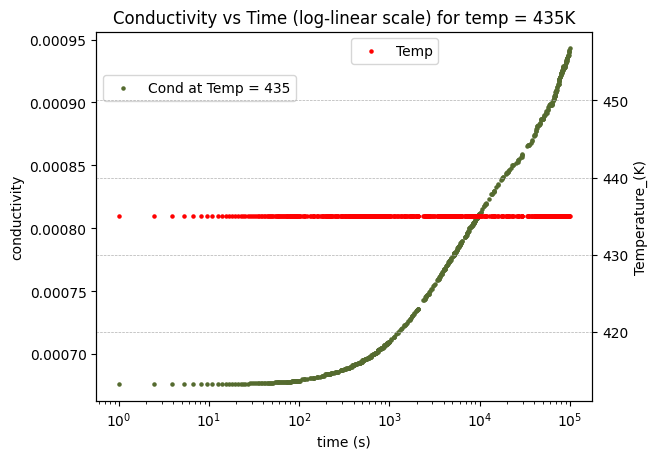

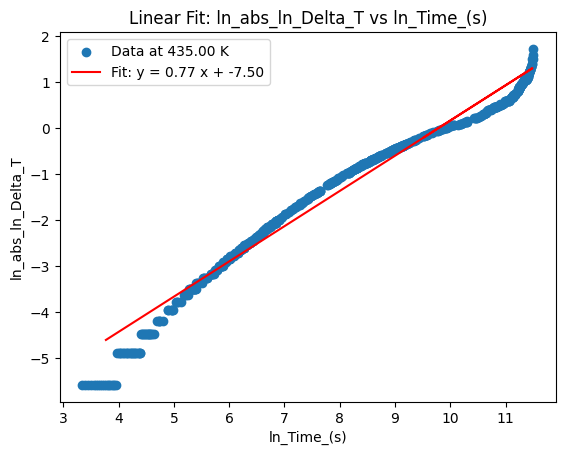

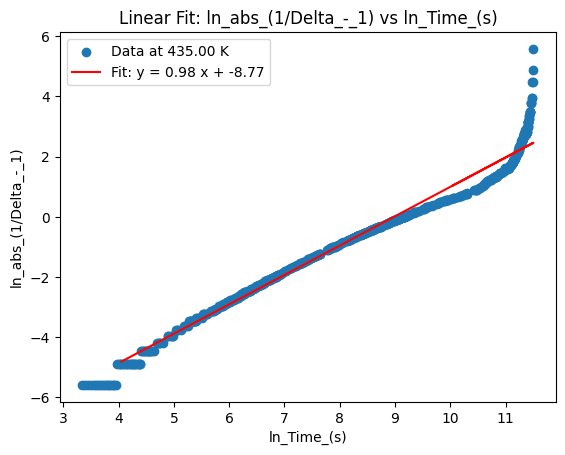

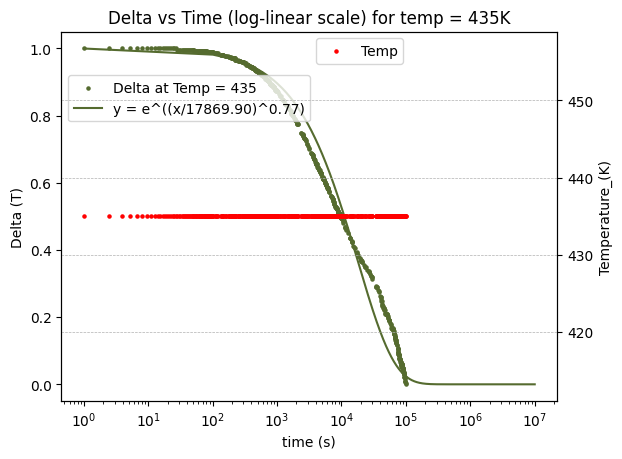

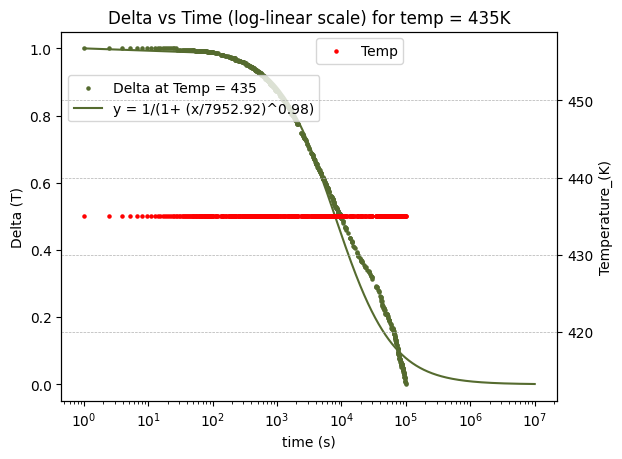

In [17]:
df_435 = pd.read_csv("/workspaces/kakalioslab/relaxation time/relaxation_time_modified/relaxation_time_temp_435.csv")
cond_435 = rx.scatter_data(df_435, "Conductivity_(S/cm)", column_type='y_column', label = "conductivity", legend_label="Cond at Temp = 435", color = 'DarkOliveGreen', marker_size=20)
time_435 = rx.scatter_data(df_435, "Time_(s)", column_type='x_column', label = "time (s)", scale='log', marker_size=20)
temp_435 = rx.scatter_data(df_435, "Control_Temperature_(K)", column_type='y_prime_column', label = "Temperature_(K)", legend_label="Temp", color = 'r', marker_size=20)
delta_435 = rx.scatter_data(df_435, "Delta_T", column_type='y_column', label = "Delta (T)", legend_label="Delta at Temp = 435", color = 'DarkOliveGreen', legend_location='upper right', marker_size=20)

rx.scatter_plot(title='Conductivity vs Time (log-linear scale) for temp = 435K', x_column=time_435, y_column=cond_435, new_column={time_435:temp_435})

beta_b_435, tau_b_435 = rx.berthelot_prediction(df_435, 10, 40)

gamma_d_435, tau_d_435 = rx.dispersive_diffusion_prediction(df_435, 20, 20)

b_line_435 = rx.line_data(np.linspace(1,10**7,100000), np.exp(-(np.linspace(1,10**7,100000) / tau_b_435)**beta_b_435), legend_label=f'y = e^((x/{tau_b_435:.2f})^{beta_b_435:.2f})', color = 'DarkOliveGreen')

rx.scatter_plot(title='Delta vs Time (log-linear scale) for temp = 435K', x_column=time_435, y_column=delta_435, new_column={time_435:temp_435}, new_line = [b_line_435])

d_line_435 = rx.line_data(np.linspace(1,10**7,100000), 1/(1 + (np.linspace(1,10**7,100000)/ tau_d_435)**gamma_d_435), legend_label=f'y = 1/(1+ (x/{tau_d_435:.2f})^{gamma_d_435:.2f})', color = 'DarkOliveGreen')
rx.scatter_plot(title='Delta vs Time (log-linear scale) for temp = 435K', x_column=time_435, y_column=delta_435, new_column={time_435:temp_435}, new_line = [d_line_435])


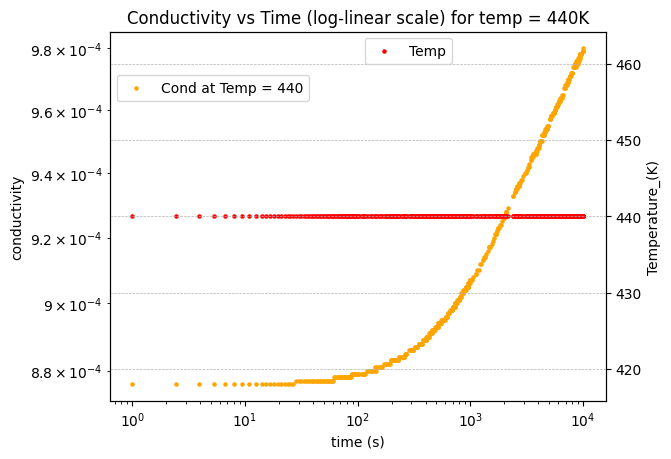

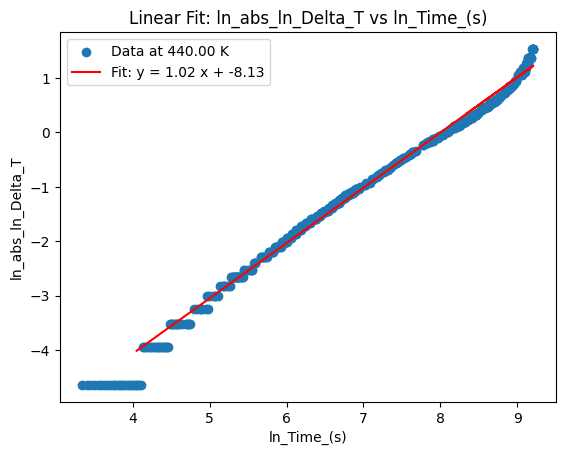

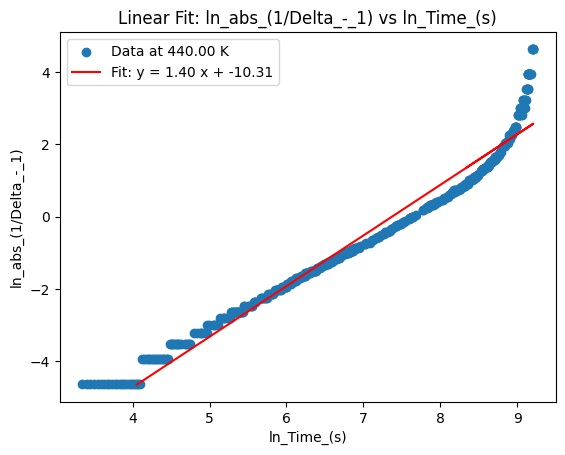

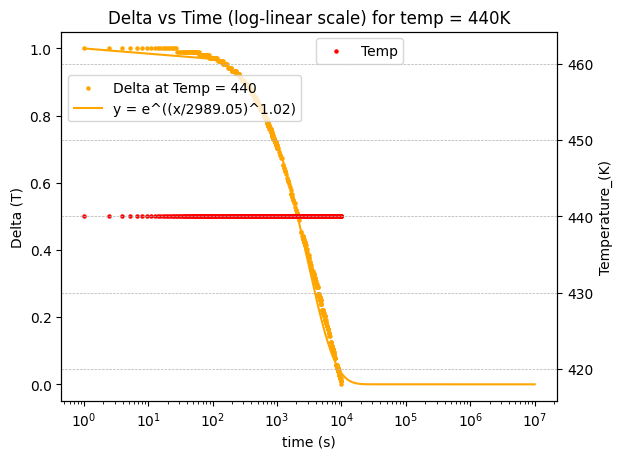

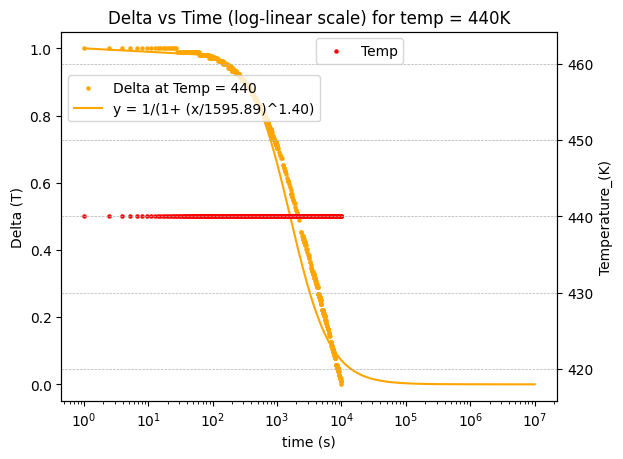

In [18]:
df_440 = pd.read_csv("/workspaces/kakalioslab/relaxation time/relaxation_time_modified/relaxation_time_temp_440.csv")
cond_440 = rx.scatter_data(df_440, "Conductivity_(S/cm)", column_type='y_column', label = "conductivity", legend_label="Cond at Temp = 440", color = 'orange', marker_size=20, scale='log')
time_440 = rx.scatter_data(df_440, "Time_(s)", column_type='x_column', label = "time (s)", scale='log', marker_size=20)
temp_440 = rx.scatter_data(df_440, "Control_Temperature_(K)", column_type='y_prime_column', label = "Temperature_(K)", legend_label="Temp", color = 'r', marker_size=20)
delta_440 = rx.scatter_data(df_440, "Delta_T", column_type='y_column', label = "Delta (T)", legend_label="Delta at Temp = 440", color = 'orange', legend_location='upper right', marker_size=20)

rx.scatter_plot(title='Conductivity vs Time (log-linear scale) for temp = 440K', x_column=time_440, y_column=cond_440, new_column={time_440:temp_440})

beta_b_440, tau_b_440 = rx.berthelot_prediction(df_440, 20, 23)

gamma_d_440, tau_d_440 = rx.dispersive_diffusion_prediction(df_440, 20, 23)

b_line_440 = rx.line_data(np.linspace(1,10**7,100000), np.exp(-(np.linspace(1,10**7,100000) / tau_b_440)**beta_b_440), legend_label=f'y = e^((x/{tau_b_440:.2f})^{beta_b_440:.2f})', color = 'orange')

rx.scatter_plot(title='Delta vs Time (log-linear scale) for temp = 440K', x_column=time_440, y_column=delta_440, new_column={time_440:temp_440}, new_line = [b_line_440])

d_line_440 = rx.line_data(np.linspace(1,10**7,100000), 1/(1 + (np.linspace(1,10**7,100000)/ tau_d_440)**gamma_d_440), legend_label=f'y = 1/(1+ (x/{tau_d_440:.2f})^{gamma_d_440:.2f})', color = 'orange')
rx.scatter_plot(title='Delta vs Time (log-linear scale) for temp = 440K', x_column=time_440, y_column=delta_440, new_column={time_440:temp_440}, new_line = [d_line_440])


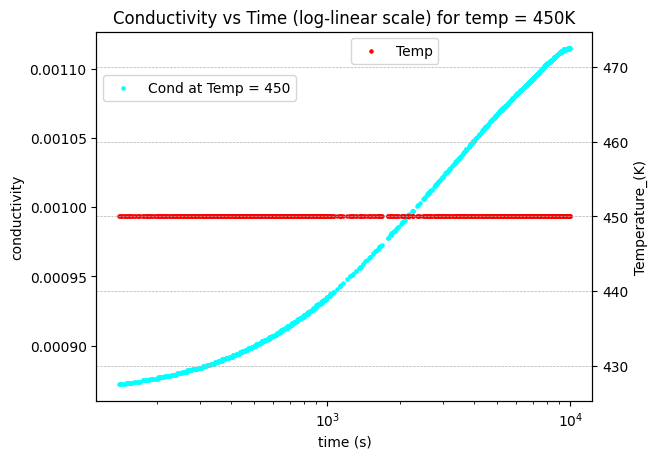

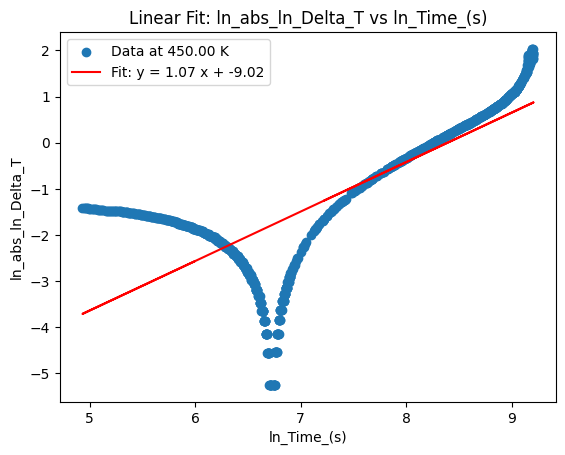

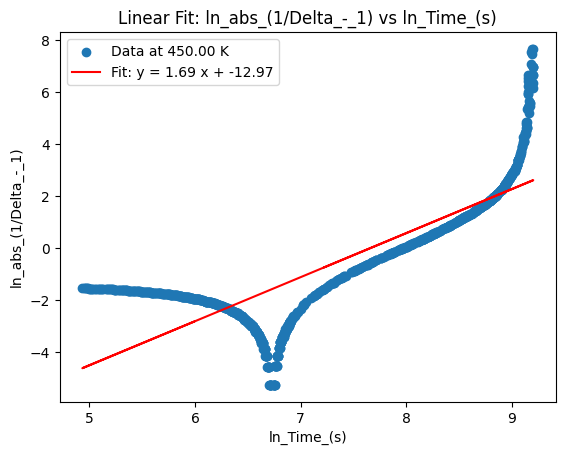

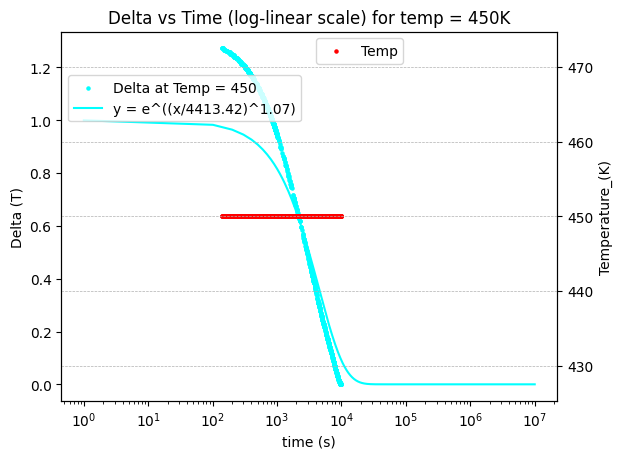

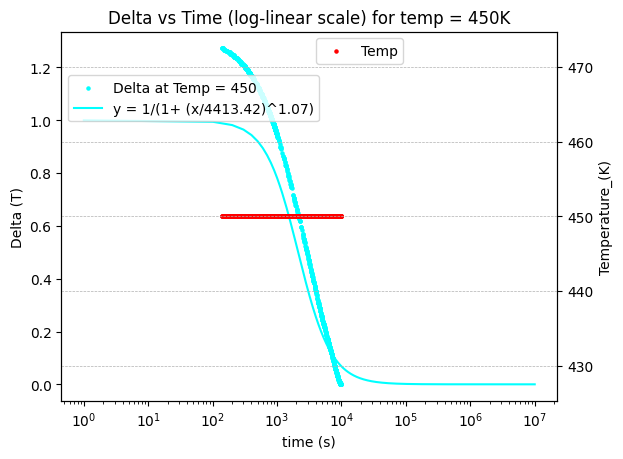

In [19]:
df_450 = pd.read_csv("/workspaces/kakalioslab/relaxation time/relaxation_time_modified/relaxation_time_temp_450.csv")
cond_450 = rx.scatter_data(df_450, "Conductivity_(S/cm)", column_type='y_column', label = "conductivity", legend_label="Cond at Temp = 450", color = 'cyan', marker_size=20)
time_450 = rx.scatter_data(df_450, "Time_(s)", column_type='x_column', label = "time (s)", scale='log', marker_size=20)
temp_450 = rx.scatter_data(df_450, "Control_Temperature_(K)", column_type='y_prime_column', label = "Temperature_(K)", legend_label="Temp", color = 'r', marker_size=20)
delta_450 = rx.scatter_data(df_450, "Delta_T", column_type='y_column', label = "Delta (T)", legend_label="Delta at Temp = 450", color = 'cyan', legend_location='upper right', marker_size=20)

rx.scatter_plot(title='Conductivity vs Time (log-linear scale) for temp = 450K', x_column=time_450, y_column=cond_450, new_column={time_450:temp_450})

beta_b_450, tau_b_450 = rx.berthelot_prediction(df_450, 0, 0)

gamma_d_450, tau_d_450 = rx.dispersive_diffusion_prediction(df_450, 0, 0)

b_line_450 = rx.line_data(np.linspace(1,10**7,100000), np.exp(-(np.linspace(1,10**7,100000) / tau_b_450)**beta_b_450), legend_label=f'y = e^((x/{tau_b_450:.2f})^{beta_b_450:.2f})', color = 'cyan')
rx.scatter_plot(title='Delta vs Time (log-linear scale) for temp = 450K', x_column=time_450, y_column=delta_450, new_column={time_450:temp_450}, new_line = [b_line_450])

d_line_450 = rx.line_data(np.linspace(1,10**7,100000), 1/(1 + (np.linspace(1,10**7,100000)/ tau_d_450)**gamma_d_450), legend_label=f'y = 1/(1+ (x/{tau_b_450:.2f})^{beta_b_450:.2f})', color = 'cyan')
rx.scatter_plot(title='Delta vs Time (log-linear scale) for temp = 450K', x_column=time_450, y_column=delta_450, new_column={time_450:temp_450}, new_line = [d_line_450])


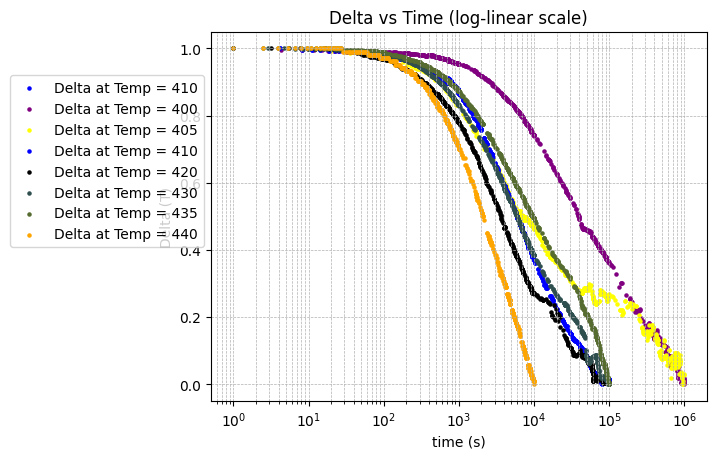

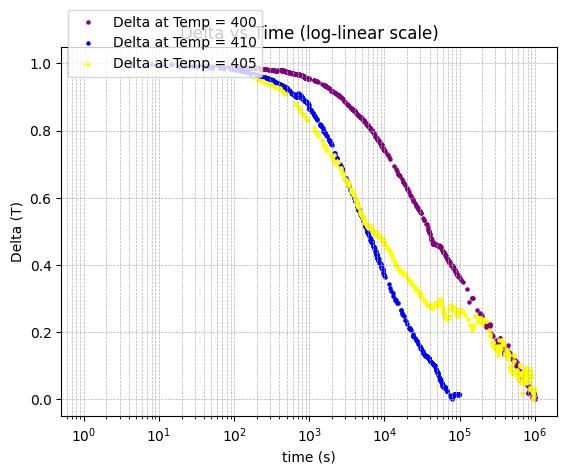

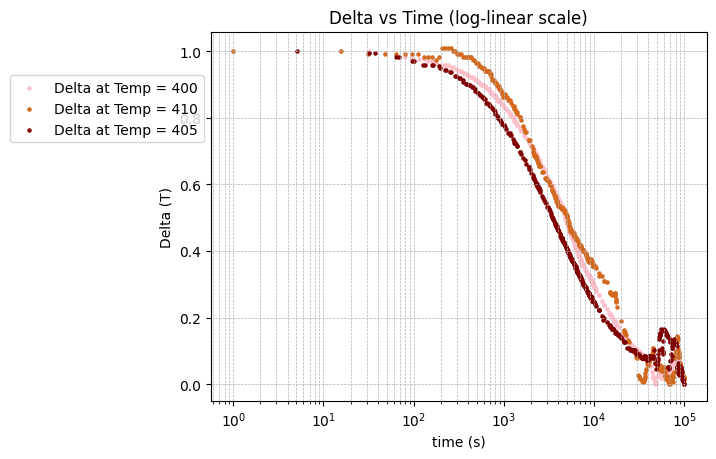

In [20]:
# rx.scatter_plot(title='Delta vs Time (log-linear scale)', x_column=time_400, y_column=delta_400, new_column={time_410:delta_410,time_420:delta_420,time_430:delta_430,time_440:delta_440}, new_line = [b_line_400,b_line_410,b_line_420,b_line_430,b_line_440])
delta_410.legend_location = "lower left"
delta_405.legend_location = "lower left"
delta_400.legend_location = "lower left"
rx.scatter_plot(title='Delta vs Time (log-linear scale)', x_column=time_410, y_column=delta_410, new_column={time_400:delta_400,time_405:delta_405,time_410:delta_410,time_420:delta_420,time_430:delta_430,time_435:delta_435,time_440:delta_440})
rx.scatter_plot(title='Delta vs Time (log-linear scale)', x_column=time_400, y_column=delta_400, new_column={time_410:delta_410,time_405:delta_405})
rx.scatter_plot(title='Delta vs Time (log-linear scale)', x_column=time_400_part_2, y_column=delta_400_part_2, new_column={time_410_part_2:delta_410_part_2,time_405_part_2:delta_405_part_2})

Finally, let's draw the graph of $\tau$ vs (1000/Temp)

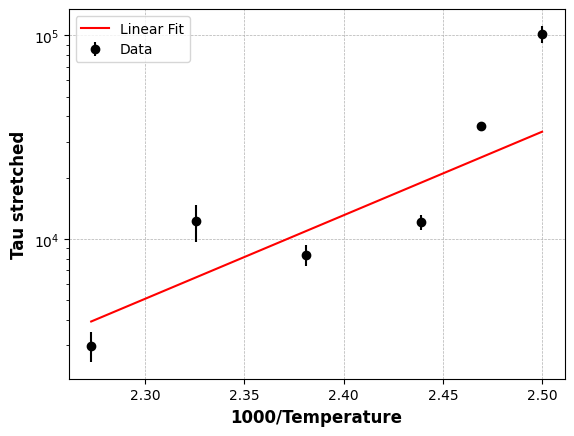

9.438715844006168


In [21]:
# Sample data (replace these with your actual data)
tau_b_array = [tau_b_400, tau_b_405, tau_b_410, tau_b_420, tau_b_430, tau_b_440]
tau_b_error = [10000, 1000, 1000, 1000, 2500, 500]
temp = [400, 405, 410, 420, 430, 440]

# Calculate 1000/Temperature
thousand_over_temp = [1000/T for T in temp]

# Take the log of tau_b_array
log_tau_b_array = np.log(tau_b_array)

# Perform linear fit on the log of tau_b_array
slope, intercept = np.polyfit(thousand_over_temp[1:], log_tau_b_array[1:], 1)
fit_function = np.poly1d([slope, intercept])

# Generate predicted values using the linear equation
predicted_log_tau = fit_function(thousand_over_temp)
predicted_tau = np.exp(predicted_log_tau)  # Convert back to original scale

# Plot the original data with error bars and the linear fit
plt.errorbar(thousand_over_temp, tau_b_array, yerr=tau_b_error, fmt='o', color='black', label='Data')
plt.plot(thousand_over_temp, predicted_tau, color='red', label='Linear Fit')
plt.yscale('log')
plt.xlabel('1000/Temperature', fontsize=12, fontweight='bold')
plt.ylabel('Tau stretched', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)

# Add legend
plt.legend(fontsize=10)

# Show plot
plt.show()
print(slope)


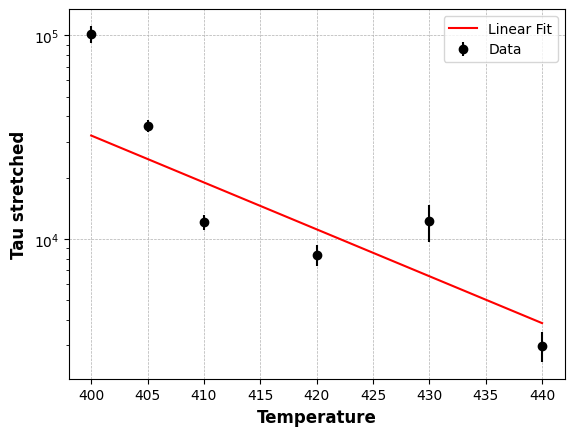

-0.0016221837213715286


In [22]:
# Sample data (replace these with your actual data)
tau_b_array = [tau_b_400, tau_b_405, tau_b_410, tau_b_420, tau_b_430, tau_b_440]
tau_b_error = [10000, 2500, 1000, 1000, 2500, 500]
temp = [400, 405, 410, 420, 430, 440]

# Take the log of tau_b_array
log_tau_b_array = np.log(tau_b_array)

# Perform linear fit on the log of tau_b_array
slope, intercept = np.polyfit(temp[1:], log_tau_b_array[1:], 1)
fit_function = np.poly1d([slope, intercept])

# Generate predicted values using the linear equation
predicted_log_tau = fit_function(temp)
predicted_tau = np.exp(predicted_log_tau)  # Convert back to original scale

# Plot the original data and the linear fit
plt.errorbar(temp, tau_b_array, yerr=tau_b_error, fmt='o', color='black', label='Data')
plt.plot(temp, predicted_tau, color='red', label='Linear Fit')
plt.yscale('log')
plt.xlabel('Temperature', fontsize=12, fontweight='bold')
plt.ylabel('Tau stretched', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)

# Add horizontal line at y=0 (not necessary for log scale)
# plt.axhline(y=0, color='black', linestyle='-', linewidth=2, zorder=1)

plt.legend(fontsize=10)
plt.show()
print((1/slope)*8.6e-5)

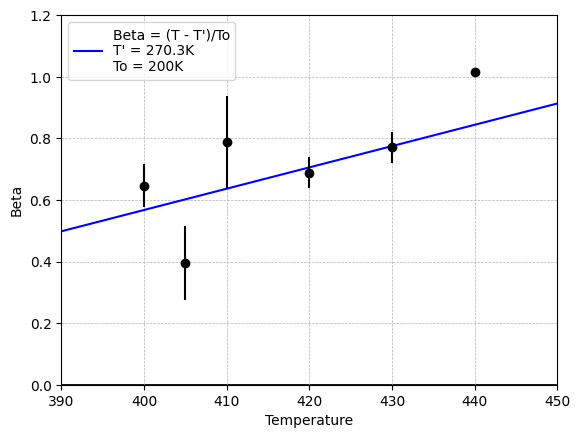

In [23]:
# %matplotlib qt
beta_b_array = [beta_b_400, beta_b_405, beta_b_410, beta_b_420, beta_b_430, beta_b_440]
beta_b_error = [0.07,0.12,0.15,0.05,0.05,0]
temp = [400, 405, 410, 420, 430, 440]

slope, intercept = np.polyfit(temp[:-1], beta_b_array[:-1], 1)

# Create a polynomial function from the slope and intercept
fit_function = np.poly1d([slope, intercept])

# Extend the temperature range for the fit line
temp_fit = np.linspace(0, 450, 100)  # More points for smoother line

# Calculate predicted beta values using the fit function
predicted_beta_fit = fit_function(temp_fit)

# Plotting
plt.plot(temp_fit, predicted_beta_fit, color='blue', label=f"Beta = (T - T')/To\nT' = 270.3K\nTo = 200K")
plt.errorbar(temp, beta_b_array, beta_b_error, color='black', fmt='o')

plt.xlabel('Temperature')
plt.ylabel('Beta')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xlim([390, 450])
plt.ylim([0, 1.2])

# Add horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-', linewidth=2, zorder=1)

plt.legend(fontsize=10)
plt.show()

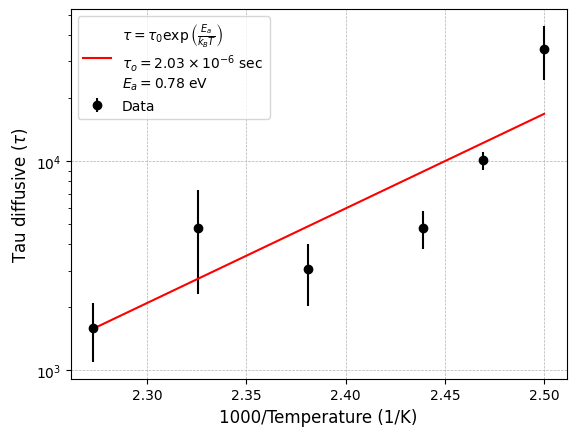

Activation Energy (Ea): 0.8973841451469047 eV
Pre-exponential Factor (τ₀): 12021677.78134279


In [24]:
# Provided data
tau_d_array = [tau_d_400, tau_d_405, tau_d_410, tau_d_420, tau_d_430, tau_d_440]
tau_d_error = [10000, 1000, 1000, 1000, 2500, 500]
temp = [400, 405, 410, 420, 430, 440]

# Calculate 1000/Temperature
thousand_over_temp = [1000 / T for T in temp]

# Take the log of tau_d_array
log_tau_d_array = np.log(tau_d_array)

# Perform linear fit on the log of tau_d_array
slope, intercept = np.polyfit(thousand_over_temp, log_tau_d_array, 1)
fit_function = np.poly1d([slope, intercept])

# Generate predicted values using the linear equation
predicted_log_tau = fit_function(thousand_over_temp)
predicted_tau = np.exp(predicted_log_tau)  # Convert back to original scale

# Calculate activation energy (Ea) in eV
k_B = 8.617333262145e-5  # Boltzmann constant in eV/K
activation_energy = slope * k_B *1000

# Calculate pre-exponential factor (tau_0)
pre_exponential_factor = np.exp(intercept)

# Plot the original data with error bars and the linear fit
plt.errorbar(thousand_over_temp, tau_d_array, yerr=tau_d_error, fmt='o', color='black', label='Data')
plt.plot(thousand_over_temp, predicted_tau, color='red', label=f'$\\tau = \\tau_0 \\exp\\left(\\frac{{E_a}}{{k_B T}}\\right)$\n$\\tau_o = 2.03 \\times 10^{{-6}}$ sec \n$E_a = 0.78$ eV')
plt.yscale('log')
plt.xlabel('1000/Temperature (1/K)', fontsize=12)
plt.ylabel('Tau diffusive ($\\tau$)', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Add legend
plt.legend(fontsize=10)

# Show plot
plt.show()

# Print activation energy and pre-exponential factor
print(f"Activation Energy (Ea): {activation_energy} eV")
print(f"Pre-exponential Factor (τ₀): {1/pre_exponential_factor}")


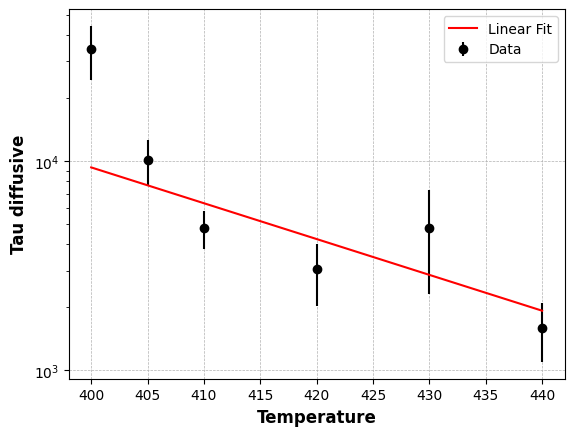

-25.335371594374344


In [25]:
# Sample data (replace these with your actual data)
tau_d_array = [tau_d_400, tau_d_405, tau_d_410, tau_d_420, tau_d_430, tau_d_440]
tau_d_error = [10000, 2500, 1000, 1000, 2500, 500]
temp = [400, 405, 410, 420, 430, 440]

# Take the log of tau_d_array
log_tau_d_array = np.log(tau_d_array)

# Perform linear fit on the log of tau_d_array
slope, intercept = np.polyfit(temp[1:], log_tau_d_array[1:], 1)
fit_function = np.poly1d([slope, intercept])

# Generate predicted values using the linear equation
predicted_log_tau = fit_function(temp)
predicted_tau = np.exp(predicted_log_tau)  # Convert back to original scale

# Plot the original data and the linear fit
plt.errorbar(temp, tau_d_array, yerr=tau_d_error, fmt='o', color='black', label='Data')
plt.plot(temp, predicted_tau, color='red', label='Linear Fit')
plt.yscale('log')
plt.xlabel('Temperature', fontsize=12, fontweight='bold')
plt.ylabel('Tau diffusive', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)

# Add horizontal line at y=0 (not necessary for log scale)
# plt.axhline(y=0, color='black', linestyle='-', linewidth=2, zorder=1)

plt.legend(fontsize=10)
plt.show()
print((1/slope))

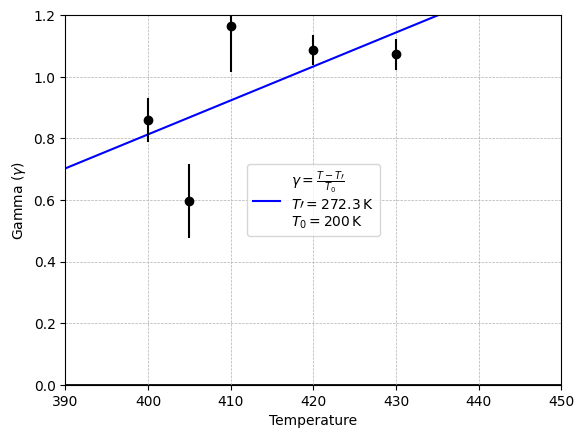

In [26]:
gamma_d_array = [gamma_d_400, gamma_d_405, gamma_d_410, gamma_d_420, gamma_d_430, gamma_d_440]
gamma_error = [0.07,0.12,0.15,0.05,0.05,0]
temp = [400, 405, 410, 420, 430, 440]

slope, intercept = np.polyfit(temp[:-1], gamma_d_array[:-1], 1)

# Create a polynomial function from the slope and intercept
fit_function = np.poly1d([slope, intercept])

# Extend the temperature range for the fit line
temp_fit = np.linspace(390, 450, 100)  # More points for smoother line

# Calculate predicted beta values using the fit function
predicted_beta_fit = fit_function(temp_fit)

# Plotting
plt.plot(temp_fit, predicted_beta_fit, color='blue', 
         label='$\\gamma = \\frac{T - T\\prime}{T_0}$\n$T\\prime = 272.3\\,\\text{K}$\n$T_0 = 200\\,\\text{K}$')
plt.errorbar(temp, gamma_d_array, gamma_error, color='black', fmt='o')

plt.xlabel('Temperature')
plt.ylabel('Gamma ($\\gamma$)')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xlim([390, 450])
plt.ylim([0, 1.2])

# Add horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-', linewidth=2, zorder=1)

plt.legend(fontsize=10, loc='center', bbox_to_anchor=(0.5, 0.5), ncol=1)
plt.show()


/tmp/ipykernel_24566/1113935908.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=10)


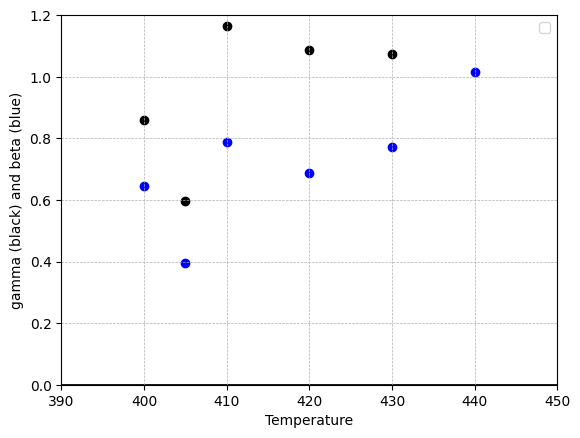

In [27]:
beta_b_array = [beta_b_400, beta_b_405, beta_b_410, beta_b_420, beta_b_430, beta_b_440]
gamma_d_array = [gamma_d_400, gamma_d_405, gamma_d_410, gamma_d_420, gamma_d_430, gamma_d_440]
temp = [400, 405, 410, 420, 430, 440]

plt.scatter(temp, gamma_d_array, color='black')
plt.scatter(temp, beta_b_array, color='blue')

plt.xlabel('Temperature')
plt.ylabel('gamma (black) and beta (blue)')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xlim([390, 450])
plt.ylim([0, 1.2])

plt.axhline(y=0, color='black', linestyle='-', linewidth=2, zorder=1)

plt.legend(fontsize=10)
plt.show()